# Bat project

In [ ]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
kinship_data_r = pd.read_csv('/content/drive/MyDrive/Bats/plink2.kin0', sep='\t')


In [ ]:
kinship_data = kinship_data_r[kinship_data_r['NSNP'] > 50000]
kinship_data

,#IID1,IID2,NSNP,HETHET,IBS0,KINSHIP
0,GSO-129-b,GSO-68-a,51422,0.144471,0.052798,-0.011133
1,GSO-43-c,GSO-68-a,51308,0.106143,0.074374,-0.112256
2,GSO-43-c,GSO-129-b,51151,0.133155,0.067213,-0.032585
3,GSO-14-d,GSO-68-a,51150,0.100528,0.101564,-0.180991
4,GSO-14-d,GSO-129-b,51003,0.141501,0.050683,-0.000144
...,...,...,...,...,...,...
5454,GSO-102-a,GSO-121-h,50923,0.130334,0.062781,-0.036189
5455,GSO-102-a,GSO-93-k,50760,0.116627,0.081994,-0.120044
5456,GSO-102-a,GSO-66-m,51442,0.108063,0.109638,-0.267666
5457,GSO-102-a,GSO-90-n,51326,0.119803,0.074718,-0.096523


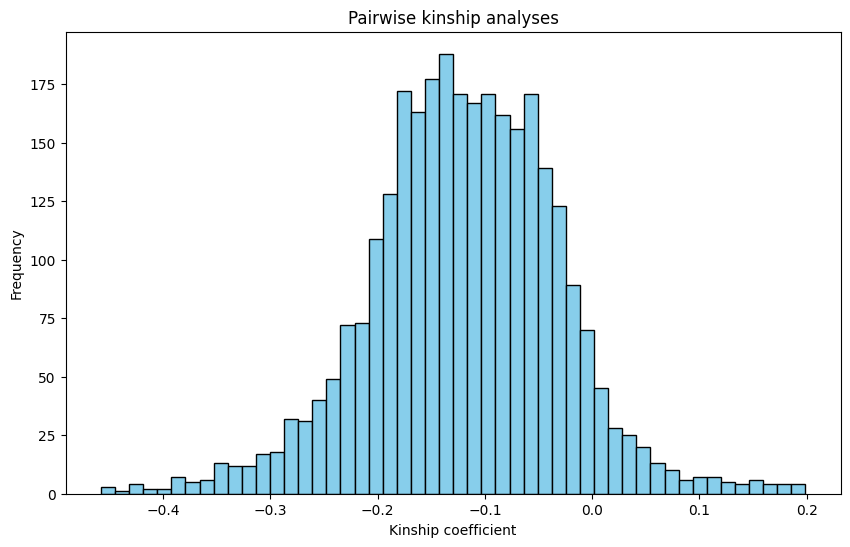

In [ ]:
import matplotlib.pyplot as plt

# Plot the distribution of kinship coefficients
plt.figure(figsize=(10, 6))
plt.hist(kinship_data['KINSHIP'], bins=50, color='skyblue', edgecolor='black')
plt.title('Pairwise kinship analyses')
plt.xlabel('Kinship coefficient')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()


In [ ]:
import numpy as np

# Crear un DataFrame vacío con los identificadores como índice y columnas
kinship_matrix = pd.DataFrame(index=kinship_data_r['#IID1'].append(kinship_data_r['IID2']).unique(),
                              columns=kinship_data_r['#IID1'].append(kinship_data_r['IID2']).unique())

# Llenar el DataFrame con los valores de parentesco
for index, row in kinship_data_r.iterrows():
    kinship_matrix.loc[row['#IID1'], row['IID2']] = row['KINSHIP']
    kinship_matrix.loc[row['IID2'], row['#IID1']] = row['KINSHIP']

# Llenar la diagonal principal con 0.5 (indicando la relación de un individuo consigo mismo)
np.fill_diagonal(kinship_matrix.values, 0.5)

# Convertir a float
kinship_matrix = kinship_matrix.astype(float)

# Mostrar las primeras filas
kinship_matrix.head()


<ipython-input-5-4b7f48632e66>:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kinship_matrix = pd.DataFrame(index=kinship_data_r['#IID1'].append(kinship_data_r['IID2']).unique(),
<ipython-input-5-4b7f48632e66>:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  columns=kinship_data_r['#IID1'].append(kinship_data_r['IID2']).unique())


,GSO-129-b,GSO-43-c,GSO-14-d,GSO-51-e,GSO-85-f,GSO-21-g,GSO-106-h,GSO-74-k,GSO-7-m,GSO-73-n,...,GSO-19-f,GSO-63-g,GSO-121-h,GSO-93-k,GSO-66-m,GSO-90-n,GSO-99-p,GSO-69-q,GSO-102-a,GSO-68-a
GSO-129-b,0.500000,-0.032585,-0.000144,0.007880,-0.099176,-0.072796,-0.135884,-0.071558,-0.064438,-0.009947,...,-0.120775,-0.233558,-0.080852,-0.170356,-0.119156,0.011672,0.123025,0.079542,0.096746,-0.011133
GSO-43-c,-0.032585,0.500000,-0.057309,0.019124,-0.140199,-0.060912,-0.165056,-0.127061,-0.162037,0.000398,...,-0.225271,-0.191340,0.106217,-0.075111,-0.106357,-0.131555,-0.115991,-0.011087,0.053156,-0.112256
GSO-14-d,-0.000144,-0.057309,0.500000,-0.032602,-0.109711,-0.131333,-0.185571,-0.178960,-0.179418,-0.115512,...,-0.160485,-0.206350,-0.120867,-0.202130,-0.315499,-0.044501,-0.137332,0.005754,-0.031392,-0.180991
GSO-51-e,0.007880,0.019124,-0.032602,0.500000,-0.131391,-0.011871,-0.170677,-0.171118,-0.108060,-0.013952,...,-0.215160,-0.196189,-0.091720,-0.137175,-0.194348,-0.095700,-0.026777,0.042555,0.030191,-0.181961
GSO-85-f,-0.099176,-0.140199,-0.109711,-0.131391,0.500000,0.005512,-0.101934,-0.099239,-0.102431,-0.182300,...,-0.062488,-0.144754,-0.143945,-0.183636,-0.368522,-0.120465,-0.202804,-0.191990,-0.103897,-0.231594


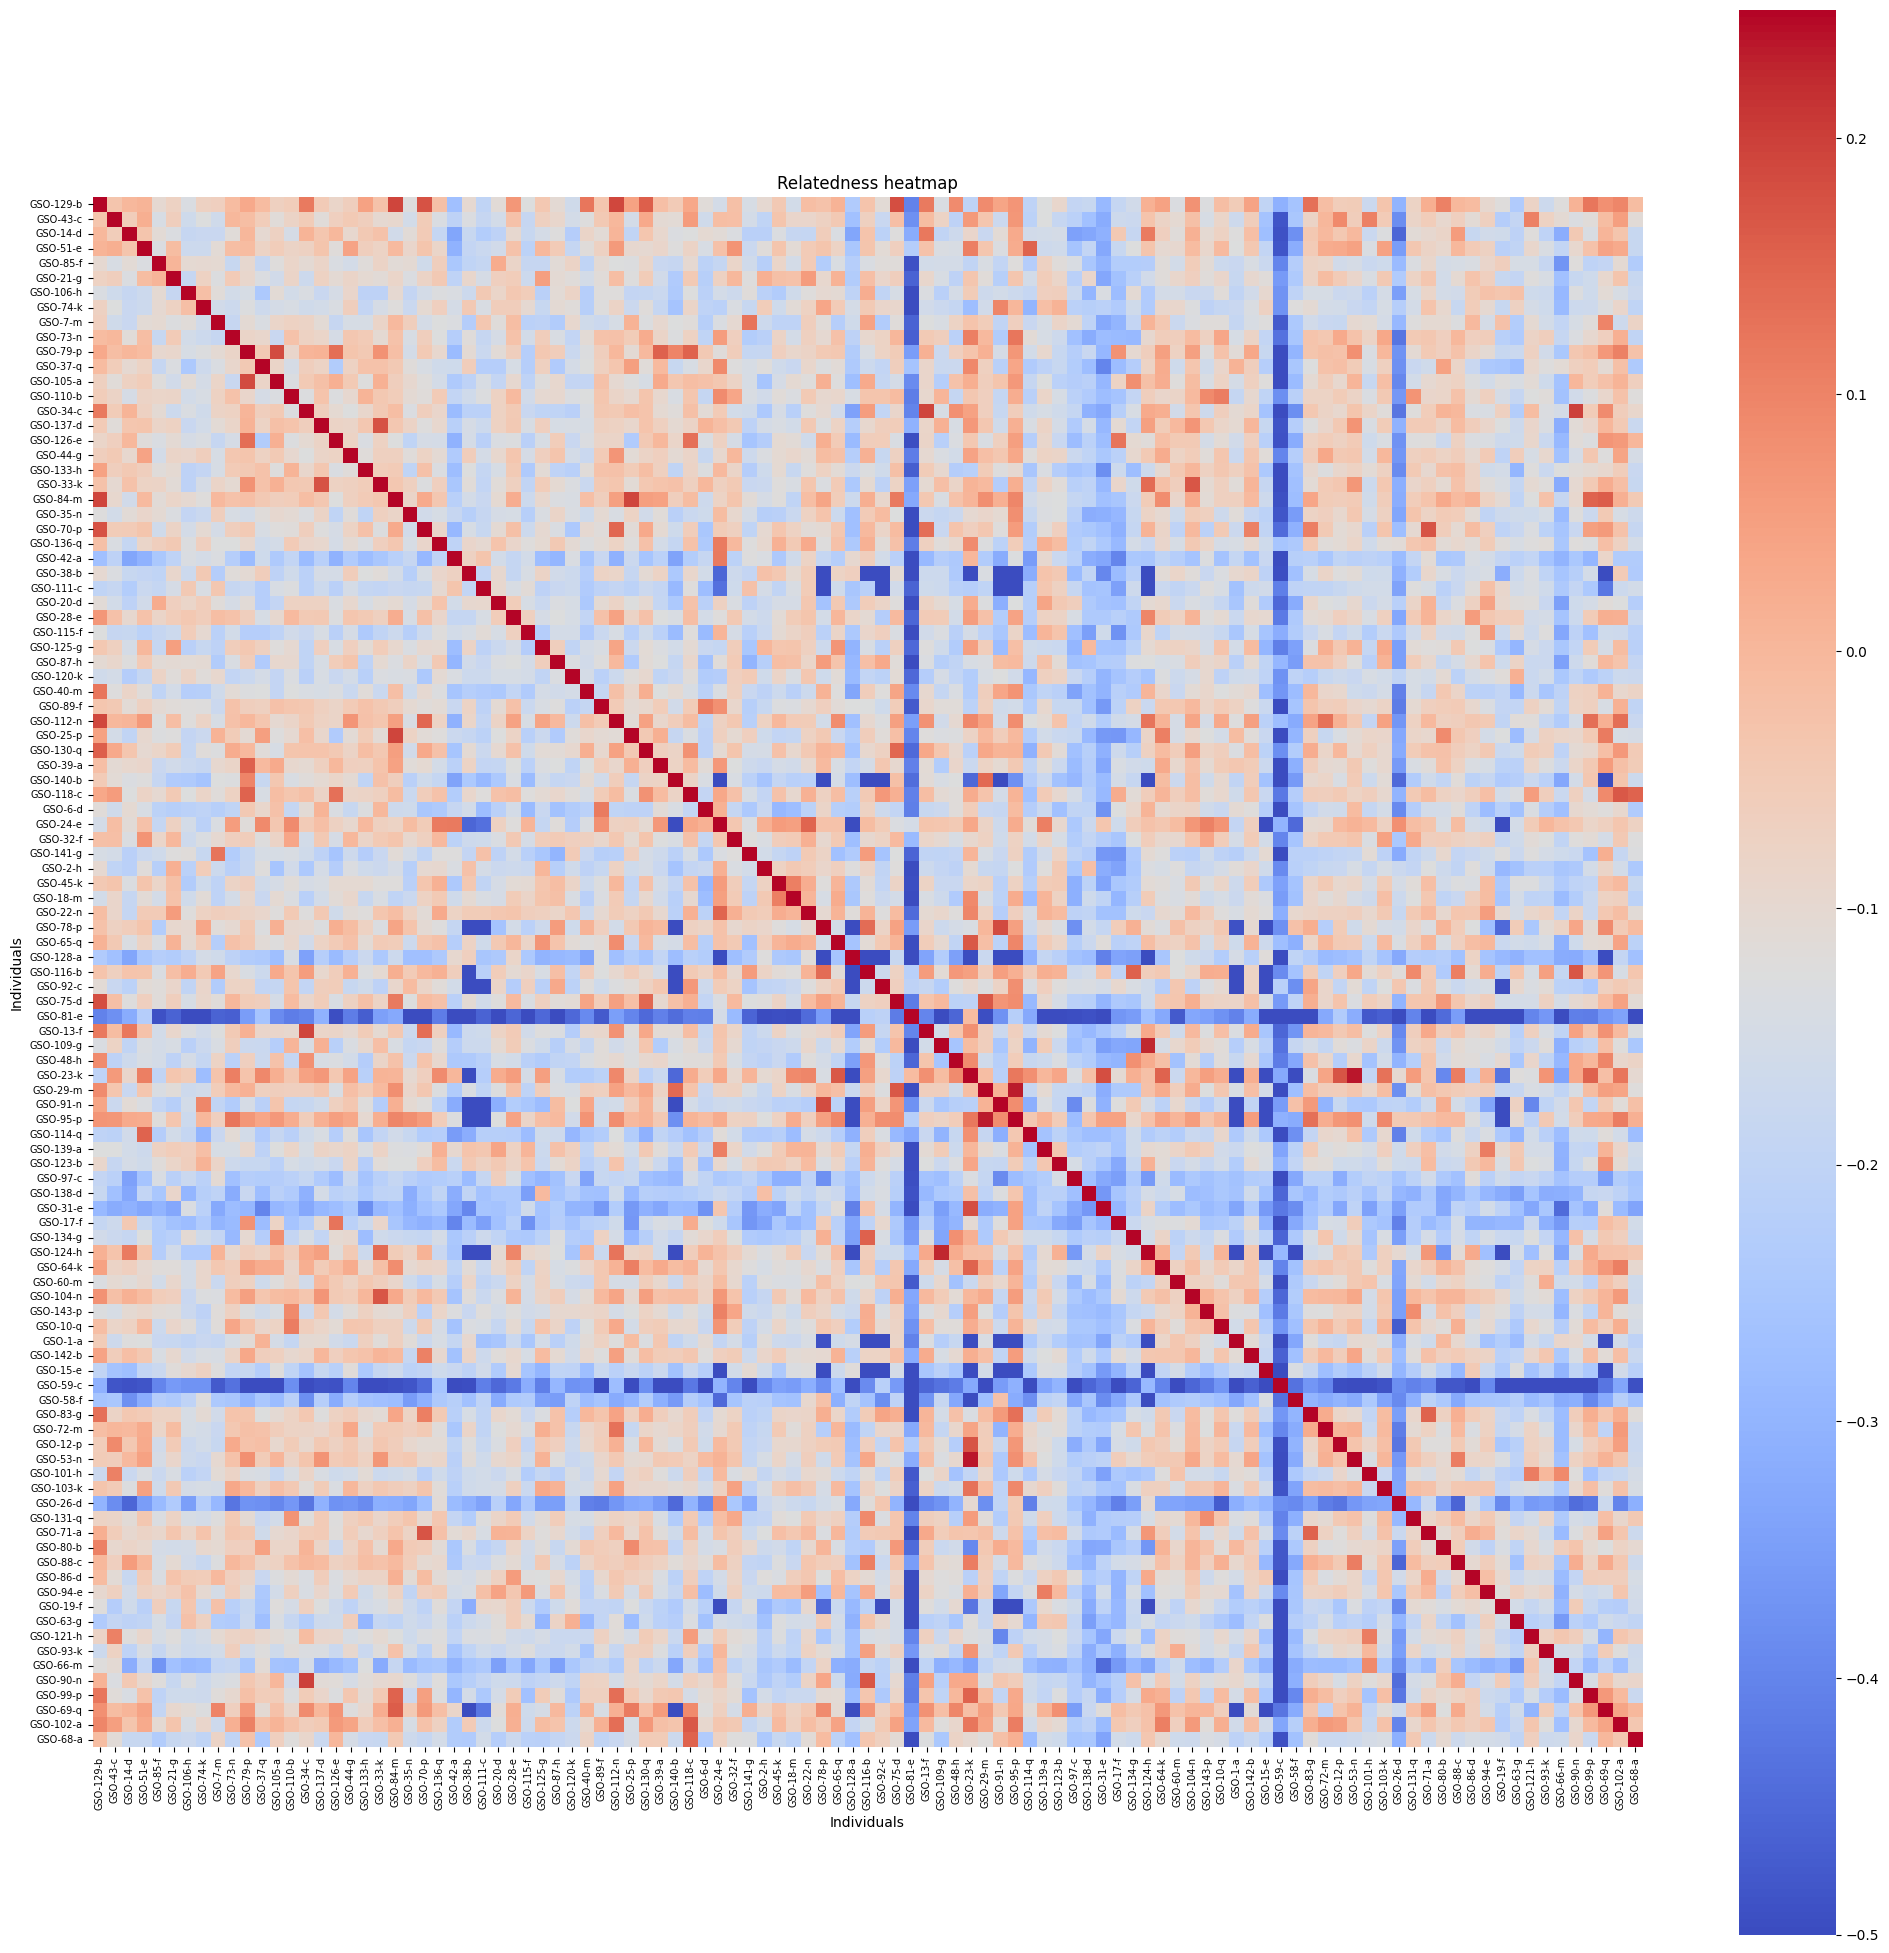

In [ ]:
import seaborn as sns
plt.figure(figsize=(25, 25))
sns.heatmap(kinship_matrix, cmap='coolwarm', square=True, vmin=-0.5, vmax=0.25)
plt.title('Relatedness heatmap')
plt.xlabel('Individuals')
plt.ylabel('Individuals')
plt.tick_params(axis='both', which='major', labelsize=7)
plt.show()


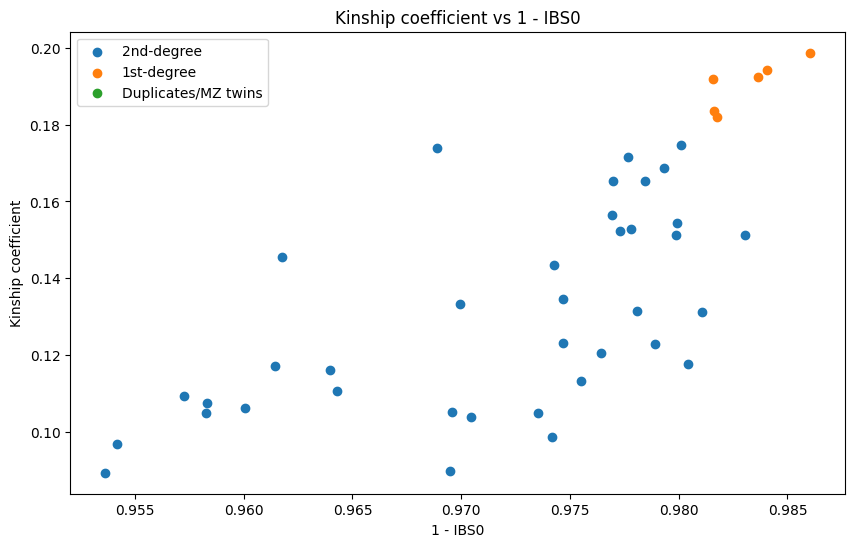

In [ ]:
# Filter the pairs with kinship coefficient greater than 0.0884
filtered_data = kinship_data[kinship_data['KINSHIP'] > 0.0884].copy()

# Create a new column for relationship type
filtered_data['relationship'] = pd.cut(filtered_data['KINSHIP'], bins=[0.0884, 0.177, 0.354, np.inf], labels=['2nd-degree', '1st-degree', 'Duplicates/MZ twins'], include_lowest=True)

# Create the plot
plt.figure(figsize=(10, 6))
for relationship, data in filtered_data.groupby('relationship'):
    plt.scatter(1 - data['IBS0'], data['KINSHIP'], label=relationship)
plt.title('Kinship coefficient vs 1 - IBS0')
plt.xlabel('1 - IBS0')
plt.ylabel('Kinship coefficient')
plt.legend()
plt.grid(False)
plt.show()


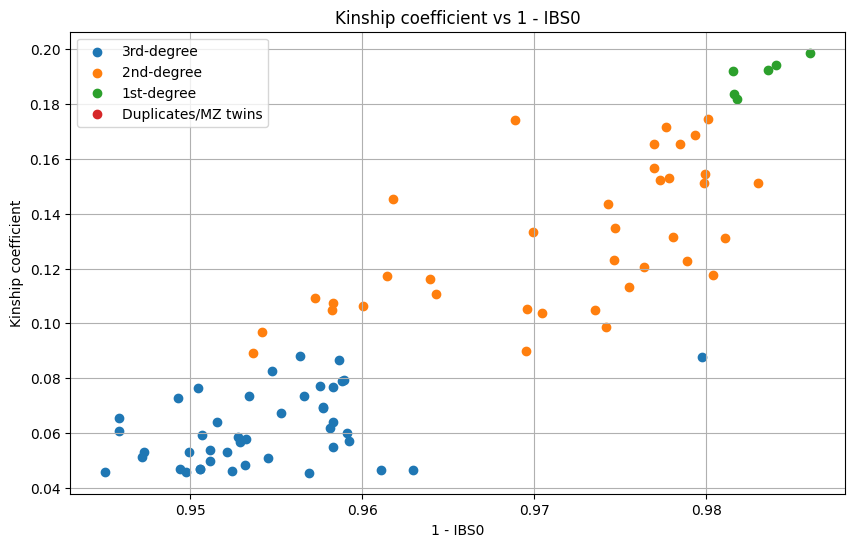

In [ ]:
# Filter the pairs with kinship coefficient greater than 0.0442
filtered_data_extended = kinship_data[kinship_data['KINSHIP'] > 0.0442].copy()

# Create a new column for relationship type
filtered_data_extended['relationship'] = pd.cut(filtered_data_extended['KINSHIP'], bins=[0.0442, 0.0884, 0.177, 0.354, np.inf], labels=['3rd-degree', '2nd-degree', '1st-degree', 'Duplicates/MZ twins'], include_lowest=True)

# Filter the pairs with NSNP more than 45000
#filtered_data_extended = filtered_data_extended[filtered_data_extended['NSNP'] > 50000]

# Create the plot
plt.figure(figsize=(10, 6))
for relationship, data in filtered_data_extended.groupby('relationship'):
    plt.scatter(1 - data['IBS0'], data['KINSHIP'], label=relationship)
plt.title('Kinship coefficient vs 1 - IBS0')
plt.xlabel('1 - IBS0')
plt.ylabel('Kinship coefficient')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Create a set of all bats
all_bats = set(kinship_data['#IID1'].unique()).union(set(kinship_data['IID2'].unique()))

# Check the total number of individuals
total_individuals = len(all_bats)
total_individuals


82

In [ ]:
# Identify individuals with 1st, 2nd, and 3rd degree relationships
first_degree_individuals = set(filtered_data_extended[filtered_data_extended['relationship'] == '1st-degree']['#IID1'].unique()).union(set(filtered_data_extended[filtered_data_extended['relationship'] == '1st-degree']['IID2'].unique()))
second_degree_individuals = set(filtered_data_extended[filtered_data_extended['relationship'] == '2nd-degree']['#IID1'].unique()).union(set(filtered_data_extended[filtered_data_extended['relationship'] == '2nd-degree']['IID2'].unique()))
third_degree_individuals = set(filtered_data_extended[filtered_data_extended['relationship'] == '3rd-degree']['#IID1'].unique()).union(set(filtered_data_extended[filtered_data_extended['relationship'] == '3rd-degree']['IID2'].unique()))

# Calculate the number of unrelated individuals
unrelated_individuals = all_bats - first_degree_individuals - second_degree_individuals - third_degree_individuals

# Calculate the percentages
percent_unrelated = len(unrelated_individuals) / total_individuals * 100
percent_third_degree = len(third_degree_individuals) / total_individuals * 100
percent_second_degree = len(second_degree_individuals) / total_individuals * 100
percent_first_degree = len(first_degree_individuals) / total_individuals * 100

percent_unrelated, percent_third_degree, percent_second_degree, percent_first_degree


(32.926829268292686, 51.21951219512195, 43.90243902439025, 10.975609756097562)

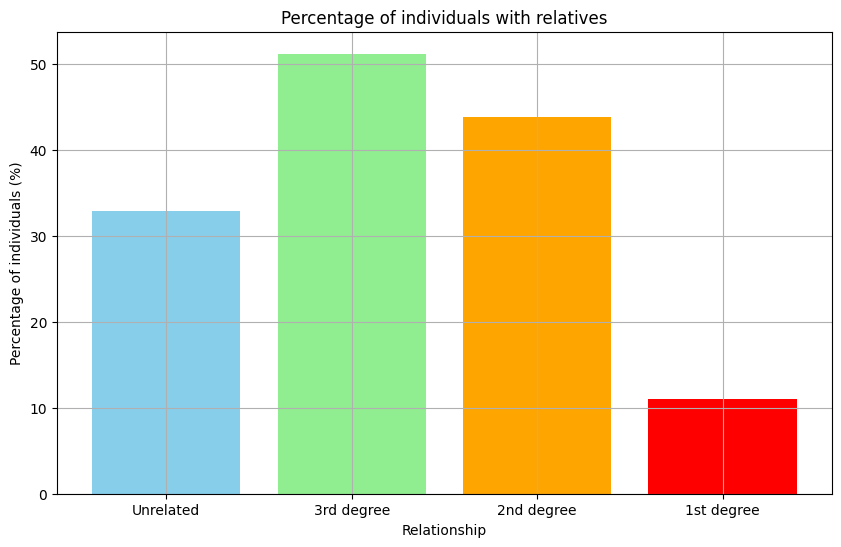

In [ ]:
# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(['Unrelated', '3rd degree', '2nd degree', '1st degree'], [percent_unrelated, percent_third_degree, percent_second_degree, percent_first_degree], color=['skyblue', 'lightgreen', 'orange', 'red'])
plt.title('Percentage of individuals with relatives')
plt.xlabel('Relationship')
plt.ylabel('Percentage of individuals (%)')
plt.grid(True)
plt.show()

In [ ]:
# Load the additional metadata with the correct delimiter
metadata = pd.read_csv('/content/drive/MyDrive/Bats/BatMetadata.csv', sep='\t')
#metadata['MinimumAgeYrs'] = metadata['MinimumAgeYrs'].str.replace(',', '.').astype(float)

# Display the first few rows of the metadata
metadata.head()


,Animal_ID,Colony,Sex,MinimumAgeYrs
0,GSO-102-a,LC,F,3.435616
1,GSO-69-q,LC,F,0.720548
2,GSO-99-p,LC,F,3.400000
3,GSO-90-n,LC,M,0.720548
4,GSO-66-m,LC,F,5.558904


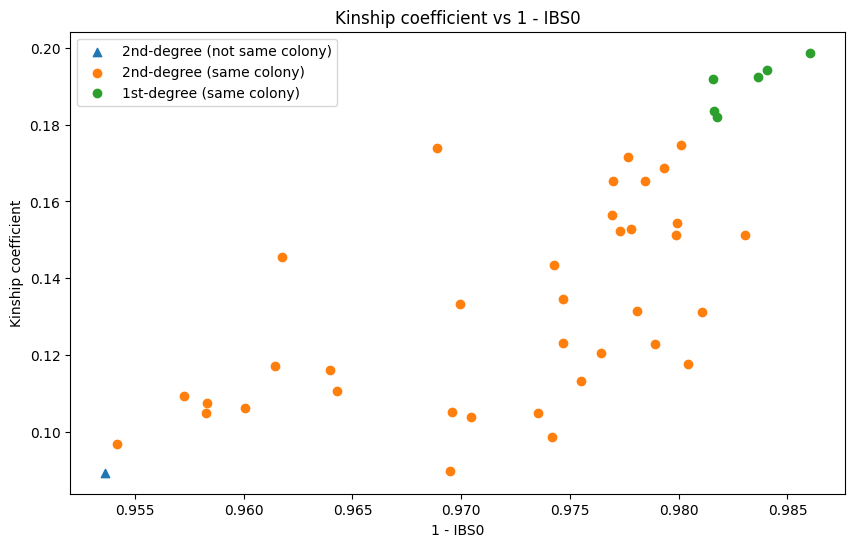

In [ ]:
# Add colony information to the filtered data
filtered_data['Colony1'] = filtered_data['#IID1'].map(metadata.set_index('Animal_ID')['Colony'])
filtered_data['Colony2'] = filtered_data['IID2'].map(metadata.set_index('Animal_ID')['Colony'])

# Create a new column to specify whether the pair is from the same colony
filtered_data['same_colony'] = filtered_data['Colony1'] == filtered_data['Colony2']

# Create the plot
plt.figure(figsize=(10, 6))
for (relationship, same_colony), data in filtered_data.groupby(['relationship', 'same_colony']):
    marker = 'o' if same_colony else '^'
    plt.scatter(1 - data['IBS0'], data['KINSHIP'], label=f'{relationship} ({"" if same_colony else "not "}same colony)', marker=marker)
plt.title('Kinship coefficient vs 1 - IBS0')
plt.xlabel('1 - IBS0')
plt.ylabel('Kinship coefficient')
plt.legend()
plt.grid(False)
plt.show()

In [ ]:
# Filter the data for pairs with 1st-degree relationship
first_degree_data = filtered_data[filtered_data['relationship'] == '1st-degree']

# Display the pairs along with their colonies
first_degree_data[['#IID1', 'Colony1', 'IID2', 'Colony2', 'same_colony']]


,#IID1,Colony1,IID2,Colony2,same_colony
89,GSO-105-a,LC,GSO-79-p,LC,True
211,GSO-84-m,LC,GSO-129-b,LC,True
687,GSO-25-p,LC,GSO-84-m,LC,True
1486,GSO-75-d,LC,GSO-129-b,LC,True
1611,GSO-13-f,LC,GSO-34-c,LC,True
5065,GSO-90-n,LC,GSO-34-c,LC,True


In [ ]:
filtered_data

,#IID1,IID2,NSNP,HETHET,IBS0,KINSHIP,relationship,Colony1,Colony2,same_colony
89,GSO-105-a,GSO-79-p,51324,0.160607,0.018393,0.183541,1st-degree,LC,LC,True
106,GSO-34-c,GSO-129-b,51363,0.147597,0.019586,0.117746,2nd-degree,LC,LC,True
147,GSO-126-e,GSO-79-p,51376,0.154644,0.030072,0.133331,2nd-degree,LC,LC,True
206,GSO-33-k,GSO-137-d,50993,0.176259,0.031122,0.174063,2nd-degree,LC,LC,True
211,GSO-84-m,GSO-129-b,51577,0.184714,0.015937,0.194279,1st-degree,LC,LC,True
254,GSO-70-p,GSO-129-b,51430,0.181412,0.019911,0.174700,2nd-degree,LC,LC,True
562,GSO-40-m,GSO-129-b,50022,0.159650,0.021111,0.122852,2nd-degree,LC,LC,True
687,GSO-25-p,GSO-84-m,51786,0.177635,0.016375,0.192557,1st-degree,LC,LC,True
704,GSO-130-q,GSO-129-b,51030,0.174113,0.023045,0.156598,2nd-degree,LC,LC,True
752,GSO-39-a,GSO-79-p,51282,0.146855,0.020085,0.154419,2nd-degree,LC,LC,True


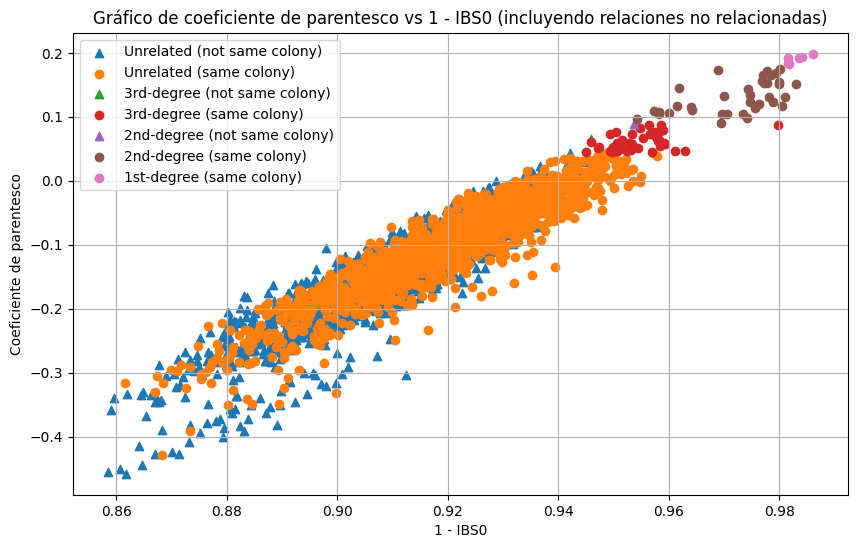

In [ ]:
# Update the DataFrame to include "unrelated" relationships
kinship_data_extended = kinship_data.copy()
kinship_data_extended['relationship'] = pd.cut(kinship_data_extended['KINSHIP'], bins=[-np.inf, 0.0442, 0.0884, 0.177, 0.354, np.inf], labels=['Unrelated', '3rd-degree', '2nd-degree', '1st-degree', 'Duplicates/MZ twins'], include_lowest=True)

# Add colony information to the extended data
kinship_data_extended['Colony1'] = kinship_data_extended['#IID1'].map(metadata.set_index('Animal_ID')['Colony'])
kinship_data_extended['Colony2'] = kinship_data_extended['IID2'].map(metadata.set_index('Animal_ID')['Colony'])

# Create a new column to specify whether the pair is from the same colony
kinship_data_extended['same_colony'] = kinship_data_extended['Colony1'] == kinship_data_extended['Colony2']

# Create the plot
plt.figure(figsize=(10, 6))
for relationship, data in kinship_data_extended.groupby('relationship'):
    for same_colony, data_same_colony in data.groupby('same_colony'):
        marker = 'o' if same_colony else '^'
        plt.scatter(1 - data_same_colony['IBS0'], data_same_colony['KINSHIP'], label=f'{relationship} ({"" if same_colony else "not "}same colony)', marker=marker)
plt.title('Kinship coefficient vs 1 - IBS0')
plt.xlabel('1 - IBS0')
plt.ylabel('Coeficiente de parentesco')
plt.legend()
plt.grid(True)
plt.show()

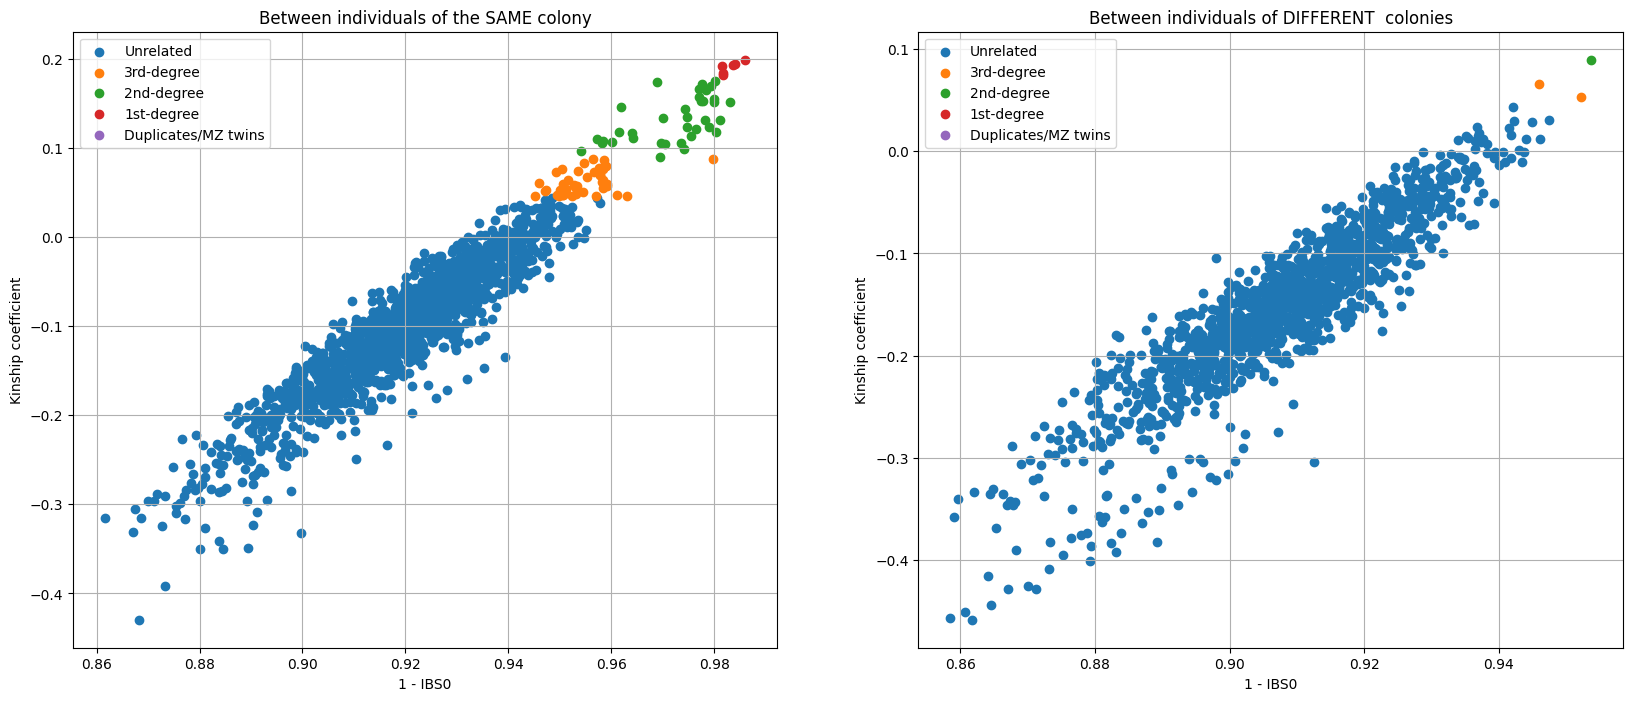

In [ ]:
# Create two subplots: one for same colony relationships, one for different colony relationships
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot same colony relationships
for relationship, data in kinship_data_extended[kinship_data_extended['same_colony']].groupby('relationship'):
    axes[0].scatter(1 - data['IBS0'], data['KINSHIP'], label=relationship)
axes[0].set_title('Between individuals of the SAME colony')
axes[0].set_xlabel('1 - IBS0')
axes[0].set_ylabel('Kinship coefficient')
axes[0].legend()
axes[0].grid(True)

# Plot different colony relationships
for relationship, data in kinship_data_extended[~kinship_data_extended['same_colony']].groupby('relationship'):
    axes[1].scatter(1 - data['IBS0'], data['KINSHIP'], label=relationship)
axes[1].set_title('Between individuals of DIFFERENT  colonies')
axes[1].set_xlabel('1 - IBS0')
axes[1].set_ylabel('Kinship coefficient')
axes[1].legend()
axes[1].grid(True)

plt.show()


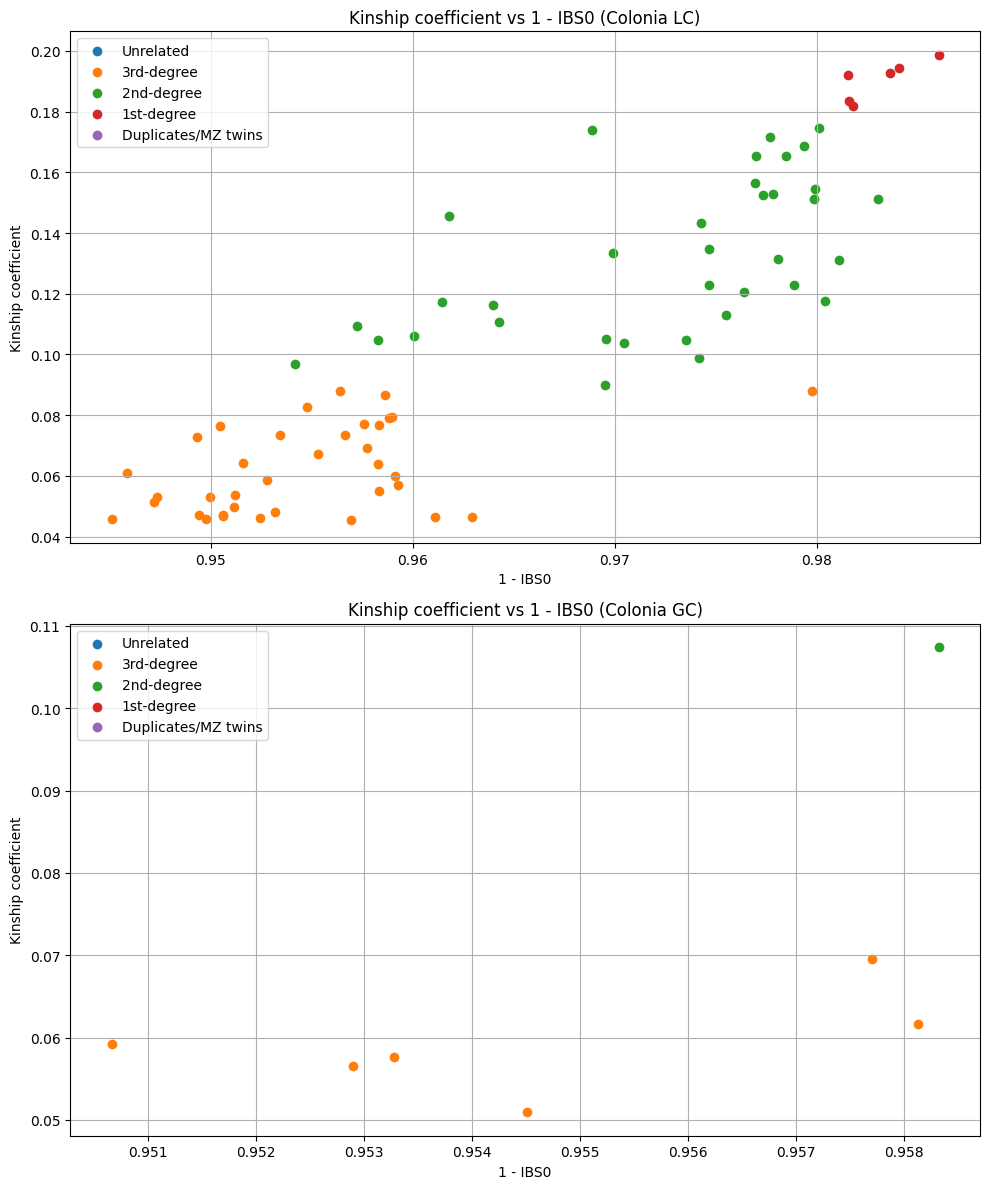

In [ ]:
# Filter for colonies LC and GC and exclude 'Unrelated' relationships
filtered_colony_data = same_colony_data[(same_colony_data['Colony1'].isin(['LC', 'GC'])) & (same_colony_data['relationship'] != 'Unrelated')]

# Get the list of filtered colonies
filtered_colonies = filtered_colony_data['Colony1'].unique()

# Create a subplot for each colony
fig, axes = plt.subplots(len(filtered_colonies), 1, figsize=(10, 6 * len(filtered_colonies)))

for ax, colony in zip(axes, filtered_colonies):
    colony_data = filtered_colony_data[(filtered_colony_data['Colony1'] == colony) | (filtered_colony_data['Colony2'] == colony)]
    for relationship, data in colony_data.groupby('relationship'):
        ax.scatter(1 - data['IBS0'], data['KINSHIP'], label=relationship)
    ax.set_title(f'Kinship coefficient vs 1 - IBS0 (Colonia {colony})')
    ax.set_xlabel('1 - IBS0')
    ax.set_ylabel('Kinship coefficient')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()



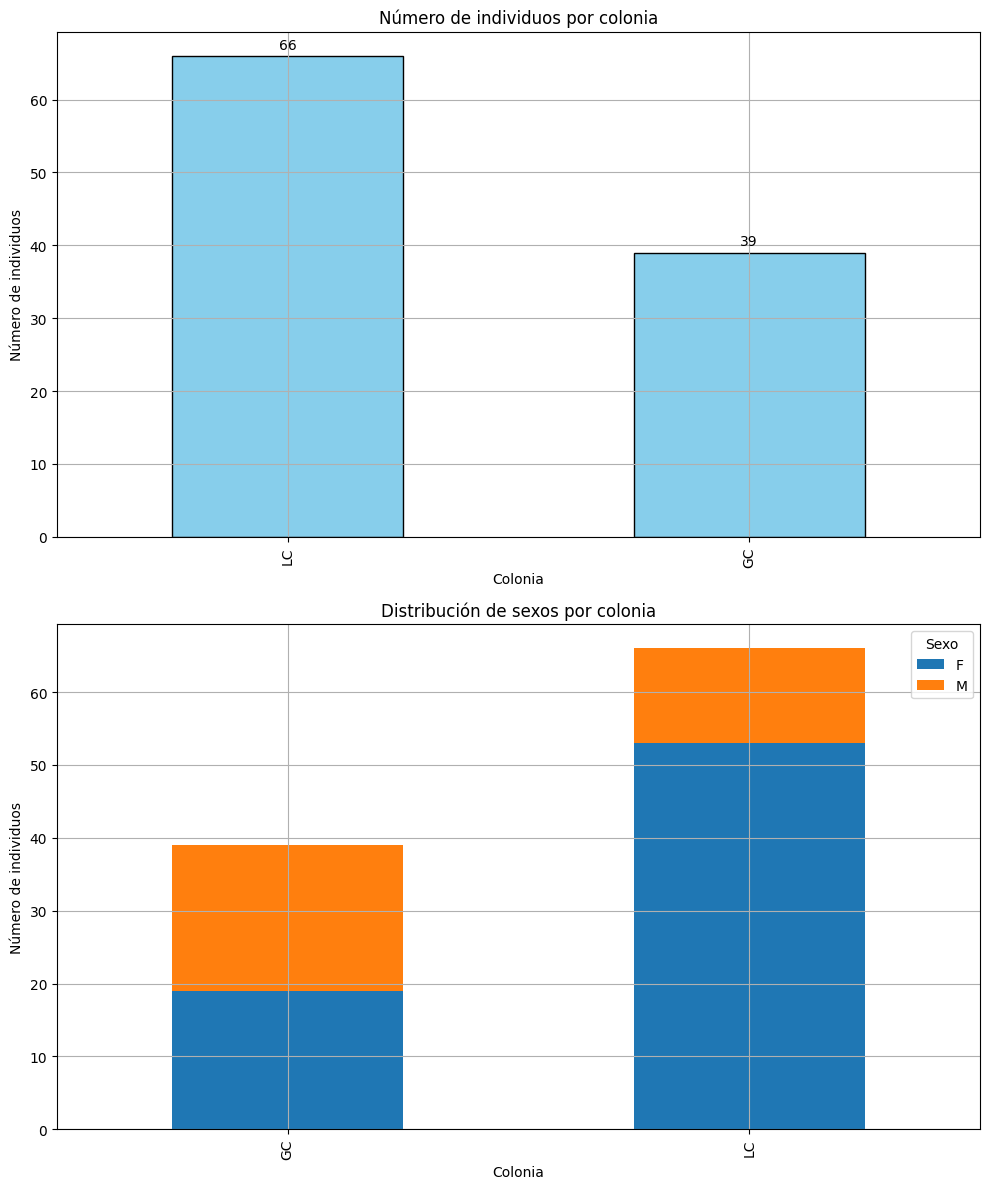

In [ ]:
# Create a subplot for colony counts and sex distribution
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Plot the number of individuals in each colony
colony_counts.plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Número de individuos por colonia')
axes[0].set_xlabel('Colonia')
axes[0].set_ylabel('Número de individuos')
axes[0].grid(True)

# Add text for the number of individuals in each colony
for i, v in enumerate(colony_counts):
    axes[0].text(i, v + 1, str(v), color='black', ha='center')

# Plot the sex distribution in each colony
sex_counts.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Sex distribution')
axes[1].set_xlabel('Colony')
axes[1].set_ylabel('Número de individuos')
axes[1].legend(title='Sex')
axes[1].grid(True)

plt.tight_layout()
plt.show()



In [ ]:
# Filter for LC colony and 1st and 2nd degree relationships
lc_relationships = filtered_colony_data[(filtered_colony_data['Colony1'] == 'LC') & (filtered_colony_data['relationship'].isin(['1st-degree', '2nd-degree']))]

# Add minimum age and sex information to the filtered data
lc_relationships['MinimumAgeYrs1'] = lc_relationships['#IID1'].map(metadata.set_index('Animal_ID')['MinimumAgeYrs'])
lc_relationships['Sex1'] = lc_relationships['#IID1'].map(metadata.set_index('Animal_ID')['Sex'])
lc_relationships['MinimumAgeYrs2'] = lc_relationships['IID2'].map(metadata.set_index('Animal_ID')['MinimumAgeYrs'])
lc_relationships['Sex2'] = lc_relationships['IID2'].map(metadata.set_index('Animal_ID')['Sex'])

# Display the pairs along with their age and sex
lc_relationships[['#IID1', 'Sex1', 'MinimumAgeYrs1', 'IID2', 'Sex2', 'MinimumAgeYrs2', 'relationship']]

# Add kinship coefficient and IBS0 to the filtered data
lc_relationships['Kinship'] = lc_relationships['KINSHIP']
lc_relationships['IBS0'] = lc_relationships['IBS0']

# Display the pairs along with their age, sex, kinship coefficient, and IBS0
lc_relationships[['#IID1', 'Sex1', 'MinimumAgeYrs1', 'IID2', 'Sex2', 'MinimumAgeYrs2', 'Kinship', 'IBS0', 'relationship']]


<ipython-input-47-e1d3090ac259>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lc_relationships['MinimumAgeYrs1'] = lc_relationships['#IID1'].map(metadata.set_index('Animal_ID')['MinimumAgeYrs'])
<ipython-input-47-e1d3090ac259>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lc_relationships['Sex1'] = lc_relationships['#IID1'].map(metadata.set_index('Animal_ID')['Sex'])
<ipython-input-47-e1d3090ac259>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

,#IID1,Sex1,MinimumAgeYrs1,IID2,Sex2,MinimumAgeYrs2,Kinship,IBS0,relationship
89,GSO-105-a,F,1.808219,GSO-79-p,M,5.558904,0.183541,0.018393,1st-degree
106,GSO-34-c,M,5.558904,GSO-129-b,M,8.241096,0.117746,0.019586,2nd-degree
147,GSO-126-e,M,2.890411,GSO-79-p,M,5.558904,0.133331,0.030072,2nd-degree
206,GSO-33-k,M,5.558904,GSO-137-d,M,4.586301,0.174063,0.031122,2nd-degree
211,GSO-84-m,F,7.520548,GSO-129-b,M,8.241096,0.194279,0.015937,1st-degree
254,GSO-70-p,F,5.271233,GSO-129-b,M,8.241096,0.174700,0.019911,2nd-degree
562,GSO-40-m,F,5.558904,GSO-129-b,M,8.241096,0.122852,0.021111,2nd-degree
687,GSO-25-p,M,5.558904,GSO-84-m,F,7.520548,0.192557,0.016375,1st-degree
704,GSO-130-q,F,5.558904,GSO-129-b,M,8.241096,0.156598,0.023045,2nd-degree
752,GSO-39-a,F,2.224658,GSO-79-p,M,5.558904,0.154419,0.020085,2nd-degree


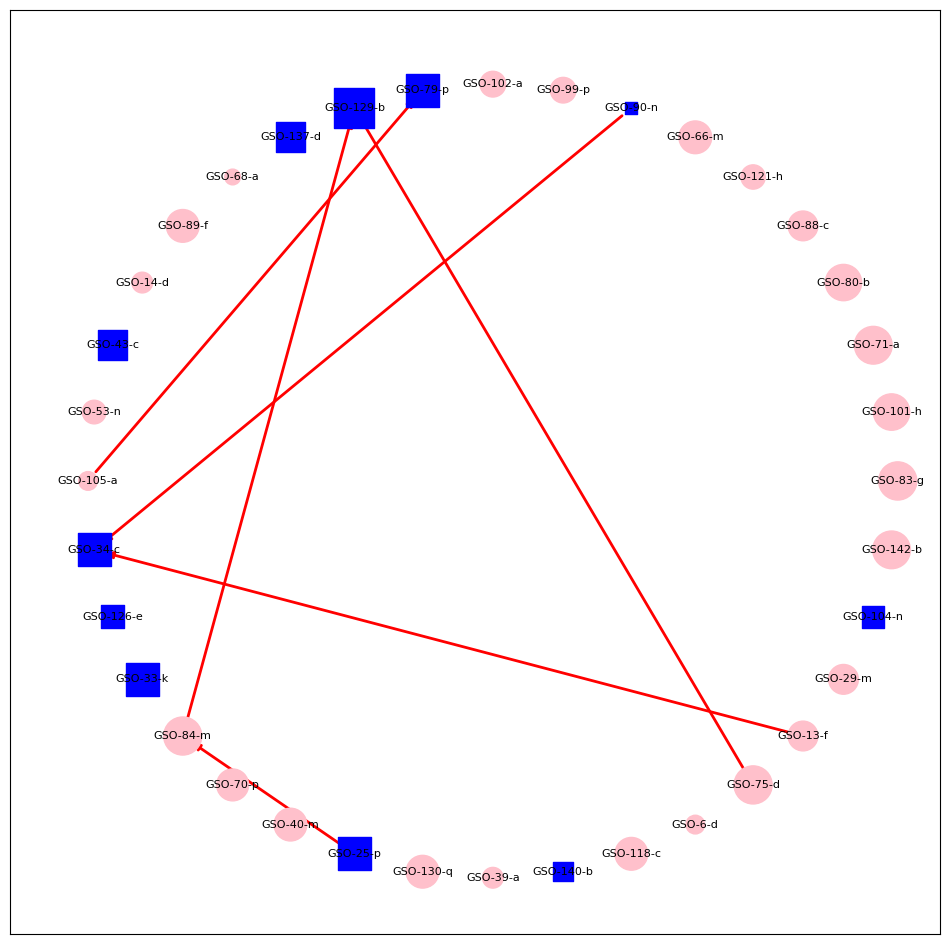

In [ ]:
# Extract sex and age information for each individual
sex_info = metadata.set_index('Animal_ID')['Sex'].to_dict()
age_info = metadata.set_index('Animal_ID')['MinimumAgeYrs'].to_dict()

# Add sex and age information to the graph nodes
for node in G.nodes():
    G.nodes[node]['sex'] = sex_info[node]
    G.nodes[node]['age'] = age_info[node]

# Define the node shapes based on the sex information
male_nodes = [node for node in G.nodes() if G.nodes[node]['sex'] == 'M']
female_nodes = [node for node in G.nodes() if G.nodes[node]['sex'] == 'F']

# Define the node sizes based on the sex and age information for male and female nodes separately
male_node_sizes = [G.nodes[node]['age']*100 for node in male_nodes]
female_node_sizes = [G.nodes[node]['age']*100 for node in female_nodes]

# Set the size of the plot
plt.figure(figsize=(12, 12))

# Draw the nodes
nx.draw_networkx_nodes(G, pos, nodelist=male_nodes, node_color='blue', node_shape='s', node_size=male_node_sizes)
nx.draw_networkx_nodes(G, pos, nodelist=female_nodes, node_color='pink', node_shape='o', node_size=female_node_sizes)

# Draw the edges
edges = G.edges(data=True)
nx.draw_networkx_edges(G, pos, edgelist=[(u, v) for (u, v, d) in edges if d['length'] == 1], width=2, edge_color='red')

# Draw the labels
nx.draw_networkx_labels(G, pos, font_size=8)

# Display the graph
plt.show()


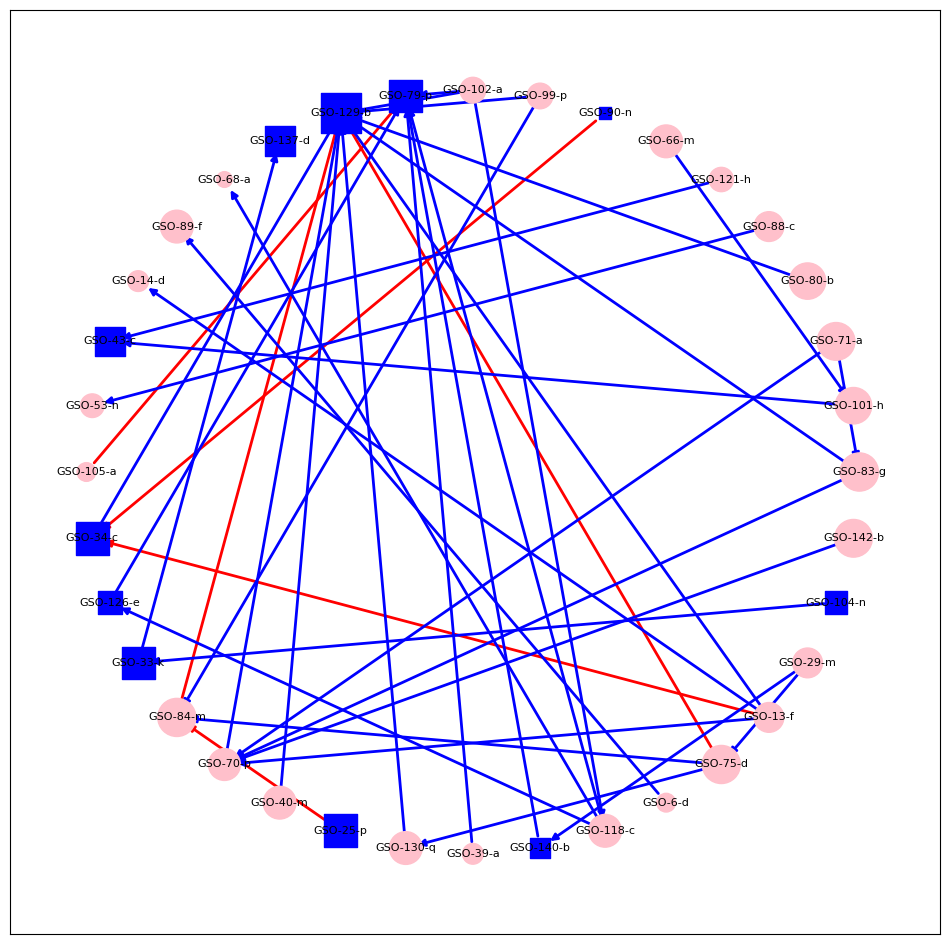

In [ ]:
# Extract sex and age information for each individual
sex_info = metadata.set_index('Animal_ID')['Sex'].to_dict()
age_info = metadata.set_index('Animal_ID')['MinimumAgeYrs'].to_dict()

# Add sex and age information to the graph nodes
for node in G.nodes():
    G.nodes[node]['sex'] = sex_info[node]
    G.nodes[node]['age'] = age_info[node]

# Define the node shapes based on the sex information
male_nodes = [node for node in G.nodes() if G.nodes[node]['sex'] == 'M']
female_nodes = [node for node in G.nodes() if G.nodes[node]['sex'] == 'F']

# Define the node sizes based on the sex and age information for male and female nodes separately
male_node_sizes = [G.nodes[node]['age']*100 for node in male_nodes]
female_node_sizes = [G.nodes[node]['age']*100 for node in female_nodes]

# Set the size of the plot
plt.figure(figsize=(12, 12))

# Draw the nodes
nx.draw_networkx_nodes(G, pos, nodelist=male_nodes, node_color='blue', node_shape='s', node_size=male_node_sizes)
nx.draw_networkx_nodes(G, pos, nodelist=female_nodes, node_color='pink', node_shape='o', node_size=female_node_sizes)

# Draw the edges
edges = G.edges(data=True)
nx.draw_networkx_edges(G, pos, edgelist=[(u, v) for (u, v, d) in edges if d['length'] == 1], width=2, edge_color='red')
nx.draw_networkx_edges(G, pos, edgelist=[(u, v) for (u, v, d) in edges if d['length'] == 2], width=2, edge_color='blue')

# Draw the labels
nx.draw_networkx_labels(G, pos, font_size=8)

# Display the graph
plt.show()


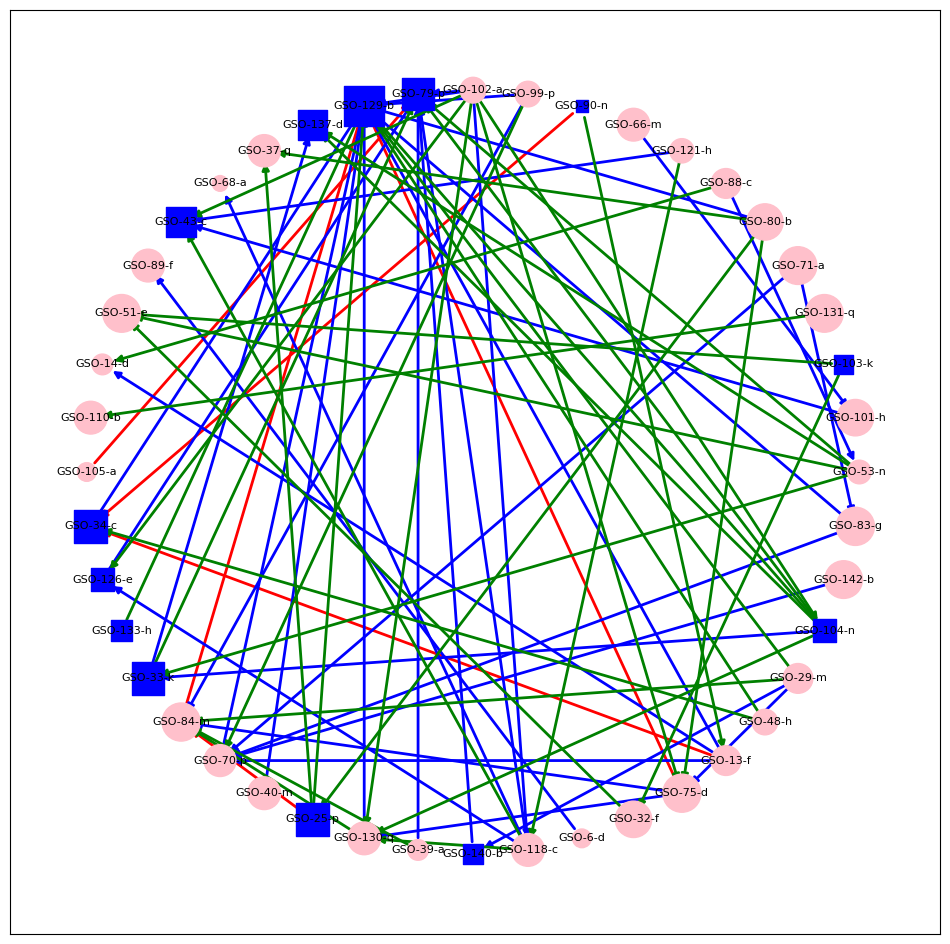

In [ ]:
# Extract sex and age information for each individual
sex_info = metadata.set_index('Animal_ID')['Sex'].to_dict()
age_info = metadata.set_index('Animal_ID')['MinimumAgeYrs'].to_dict()

# Add sex and age information to the graph nodes
for node in G_extended.nodes():
    G_extended.nodes[node]['sex'] = sex_info.get(node, 'Unknown')
    G_extended.nodes[node]['age'] = age_info.get(node, np.nan)

# Define the node shapes based on the sex information
male_nodes_extended = [node for node in G_extended.nodes() if G_extended.nodes[node]['sex'] == 'M']
female_nodes_extended = [node for node in G_extended.nodes() if G_extended.nodes[node]['sex'] == 'F']

# Define the node sizes based on the sex and age information for male and female nodes separately
male_node_sizes_extended = [G_extended.nodes[node]['age']*100 for node in male_nodes_extended]
female_node_sizes_extended = [G_extended.nodes[node]['age']*100 for node in female_nodes_extended]

# Set the size of the plot
plt.figure(figsize=(12, 12))

# Draw the nodes
nx.draw_networkx_nodes(G_extended, pos_extended, nodelist=male_nodes_extended, node_color='blue', node_shape='s', node_size=male_node_sizes_extended)
nx.draw_networkx_nodes(G_extended, pos_extended, nodelist=female_nodes_extended, node_color='pink', node_shape='o', node_size=female_node_sizes_extended)

# Draw the edges
edges_extended = G_extended.edges(data=True)
nx.draw_networkx_edges(G_extended, pos_extended, edgelist=[(u, v) for (u, v, d) in edges_extended if d['length'] == 1], width=2, edge_color='red')
nx.draw_networkx_edges(G_extended, pos_extended, edgelist=[(u, v) for (u, v, d) in edges_extended if d['length'] == 2], width=2, edge_color='blue')
nx.draw_networkx_edges(G_extended, pos_extended, edgelist=[(u, v) for (u, v, d) in edges_extended if d['length'] == 3], width=2, edge_color='green')

# Draw the labels
nx.draw_networkx_labels(G_extended, pos_extended, font_size=8)

# Display the graph
plt.show()

In [ ]:
# Get the set of all individuals in the LC colony
all_lc_individuals = set(metadata[metadata['Colony'] == 'LC']['Animal_ID'])

# Get the set of individuals in the LC colony that appear in the graph
lc_individuals_in_graph = set(G_extended.nodes())

# Find the difference between the two sets to get the individuals that do not appear in the graph
lc_individuals_not_in_graph = all_lc_individuals - lc_individuals_in_graph

# Display the individuals that do not appear in the graph
metadata[metadata['Animal_ID'].isin(lc_individuals_not_in_graph)]

,Animal_ID,Colony,Sex,MinimumAgeYrs
1,GSO-69-q,LC,F,0.720548
5,GSO-93-k,LC,F,5.558904
17,GSO-72-m,LC,F,6.838356
26,GSO-1-a,LC,F,5.558904
27,GSO-10-q,LC,F,5.558904
28,GSO-143-p,LC,F,4.589041
30,GSO-60-m,LC,F,7.517808
31,GSO-64-k,LC,F,0.720548
32,GSO-124-h,LC,F,5.558904
33,GSO-134-g,LC,F,5.558904


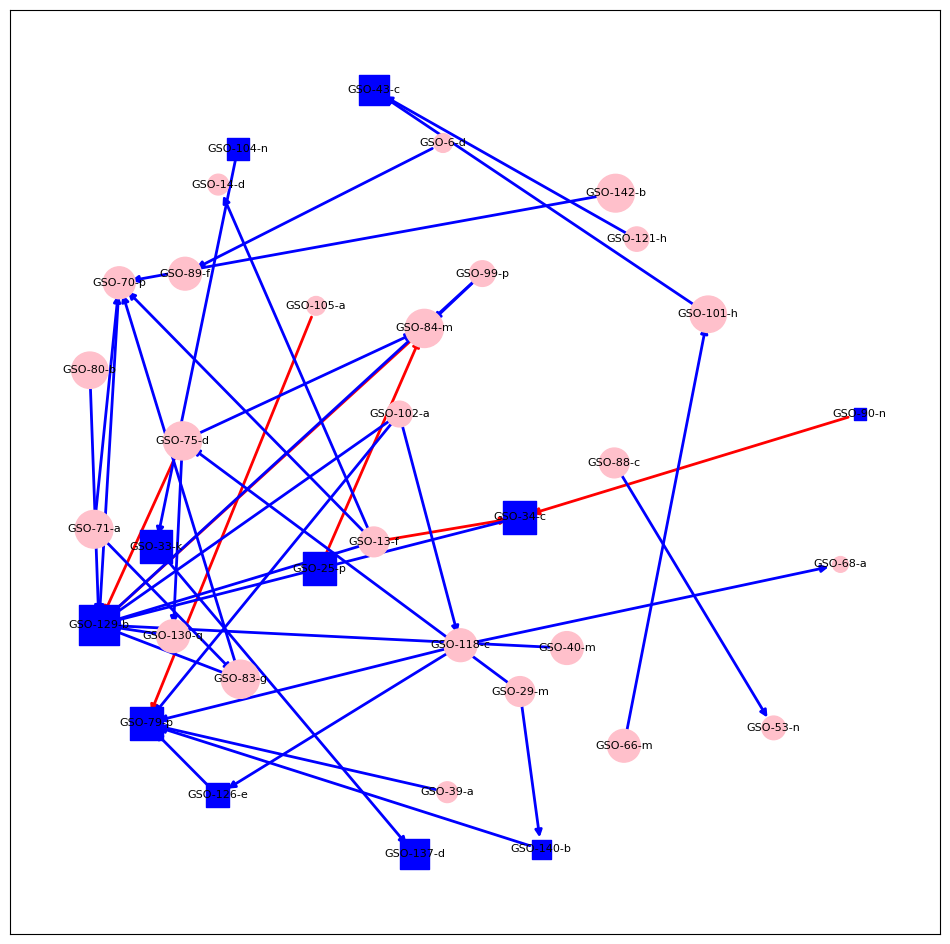

In [ ]:
# Increasing the distance between nodes in the layout can help make the graph more readable.
# One way to do this is to use the 'k' parameter in the spring_layout function, which sets the optimal distance between nodes.
# Increasing 'k' will increase the distance between the nodes.

# Define the position of each node using a spring layout with a larger 'k' value
pos_lc_1st_2nd = nx.spring_layout(G_lc_1st_2nd, seed=42, k=1)

# Set the size of the plot
plt.figure(figsize=(12, 12))

# Draw the nodes
nx.draw_networkx_nodes(G_lc_1st_2nd, pos_lc_1st_2nd, nodelist=male_nodes_lc_1st_2nd, node_color='blue', node_shape='s', node_size=male_node_sizes_lc_1st_2nd)
nx.draw_networkx_nodes(G_lc_1st_2nd, pos_lc_1st_2nd, nodelist=female_nodes_lc_1st_2nd, node_color='pink', node_shape='o', node_size=female_node_sizes_lc_1st_2nd)

# Draw the edges
edges_lc_1st_2nd = G_lc_1st_2nd.edges(data=True)
nx.draw_networkx_edges(G_lc_1st_2nd, pos_lc_1st_2nd, edgelist=[(u, v) for (u, v, d) in edges_lc_1st_2nd if d['length'] == 1], width=2, edge_color='red')
nx.draw_networkx_edges(G_lc_1st_2nd, pos_lc_1st_2nd, edgelist=[(u, v) for (u, v, d) in edges_lc_1st_2nd if d['length'] == 2], width=2, edge_color='blue')

# Draw the labels
nx.draw_networkx_labels(G_lc_1st_2nd, pos_lc_1st_2nd, font_size=8)

# Display the graph
plt.show()
